<a href="https://colab.research.google.com/github/lakus1251/Machine-learning/blob/main/%D0%9C%D0%B0%D1%87%D0%B5%D0%B1%D1%80%D0%BE%D0%B4%D0%B0_4_8_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
file_path ='/content/drive/My Drive/titanic (2).csv'
df = pd.read_csv(file_path)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
# 1. Вивести перших 5 рядків
print(df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [19]:
# 2. Визначити розмір датасета
print(df.shape)

(418, 12)


In [20]:
# 3. Визначити тип даних
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [21]:
# 4. Визначити наявність пропущених значень
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [39]:
# 5. Замінити пропущені значення на середнє значення для числових стовпців
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)
df.dropna(subset=['Embarked'], inplace=True)  # Видалення рядків з пропущеними значеннями у Embarked


In [23]:
# 6. Ще раз перевірити наявність пропущених значень
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [24]:
# 7. Перевірити наявність дублікатів
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)


0


In [25]:
# 8. Вивести описову статистику датасету
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   12.634534    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   23.000000    0.000000   
50%    1100.500000    0.000000    3.000000   30.272590    0.000000   
75%    1204.750000    1.000000    3.000000   35.750000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  418.000000  
mean     0.392344   35.627188  
std      0.981429   55.840500  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


In [26]:
# 9. Видалити стовпчик Cabin
df.drop(columns=['Cabin'], inplace=True)


In [27]:
# 10. Сформувати датасет з обраними стовпцями
df_selected = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]


In [43]:
# Замінити бінарні ознаки (Стать) на 0 і 1 з використанням .loc
df_selected.loc[:, 'Sex'] = df_selected['Sex'].map({'male': 0, 'female': 1})

print(df_selected['Sex'].unique())  # Перевірка унікальних значень

[nan]


In [29]:
# 12. Ще раз перевірити кількість пропущених даних
print(df_selected.isnull().sum())


Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64


In [30]:
# 13. Вивести 5 перших рядків датасету
print(df_selected.head())


   Survived  Pclass  Sex   Age     Fare
0         0       3    0  34.5   7.8292
1         1       3    1  47.0   7.0000
2         0       2    0  62.0   9.6875
3         0       3    0  27.0   8.6625
4         1       3    1  22.0  12.2875


In [31]:
# 14. Вивести 5 останніх рядків датасету
print(df_selected.tail())


     Survived  Pclass  Sex       Age      Fare
413         0       3    0  30.27259    8.0500
414         1       1    1  39.00000  108.9000
415         0       3    0  38.50000    7.2500
416         0       3    0  30.27259    8.0500
417         0       3    0  30.27259   22.3583


In [32]:
# 15. Аналіз виживання залежно від статі
survival_by_gender = df_selected.groupby('Sex')['Survived'].mean()
print("Survival rate by gender:\n", survival_by_gender)


Survival rate by gender:
 Sex
0    0.0
1    1.0
Name: Survived, dtype: float64


In [33]:
# 16. Відсоток виживання для кожного класу (Pclass)
survival_by_class = df_selected.groupby('Pclass')['Survived'].mean()
print("Survival rate by class:\n", survival_by_class)


Survival rate by class:
 Pclass
1    0.467290
2    0.322581
3    0.330275
Name: Survived, dtype: float64


In [34]:
# 17. Середній вік тих, хто вижив, і тих, хто не вижив
mean_age_survived = df_selected.groupby('Survived')['Age'].mean()
print("Mean age by survival:\n", mean_age_survived)

Mean age by survival:
 Survived
0    30.272699
1    30.272400
Name: Age, dtype: float64


In [44]:
# 18. Розподіл пасажирів на групи за рівнями тарифів і рівень виживання
df_selected.loc[:, 'Fare_Group'] = pd.qcut(df_selected['Fare'], 4)

# Використовуємо observed=False для уникнення попередження FutureWarning
survival_by_fare_group = df_selected.groupby('Fare_Group', observed=False)['Survived'].mean()

print("Survival rate by fare group:\n", survival_by_fare_group)

Survival rate by fare group:
 Fare_Group
(-0.001, 7.896]    0.263158
(7.896, 14.454]    0.270833
(14.454, 31.5]     0.390476
(31.5, 512.329]    0.533981
Name: Survived, dtype: float64


In [36]:
# 19. Середній тариф (Fare) для кожного класу (Pclass)
mean_fare_by_class = df_selected.groupby('Pclass')['Fare'].mean()
print("Mean fare by class:\n", mean_fare_by_class)


Mean fare by class:
 Pclass
1    94.280297
2    22.202104
3    12.565951
Name: Fare, dtype: float64


In [37]:
# 20. Середній вік пасажирів для кожного класу (Pclass)
mean_age_by_class = df_selected.groupby('Pclass')['Age'].mean()
print("Mean age by class:\n", mean_age_by_class)


Mean age by class:
 Pclass
1    40.022928
2    28.857881
3    26.090397
Name: Age, dtype: float64


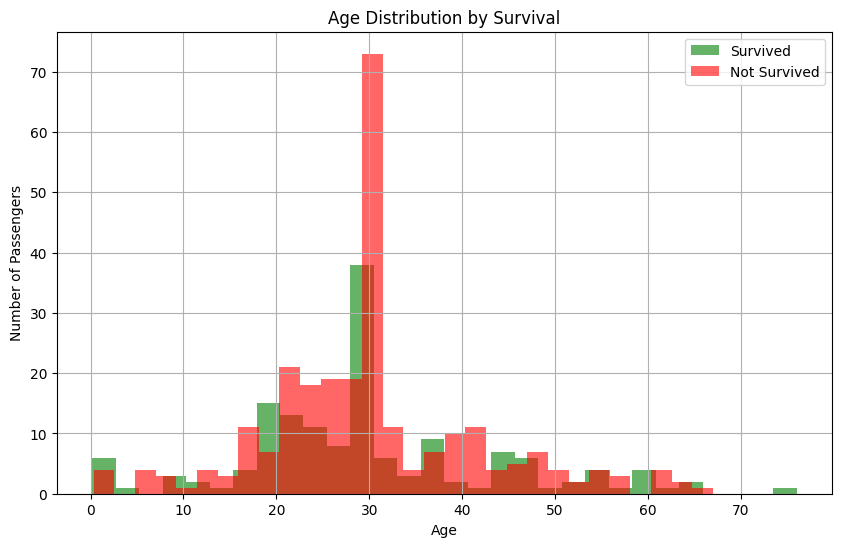

In [40]:
# 21. Побудувати гістограму розподілу віку для тих, хто вижив, і тих, хто не вижив
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
df_selected[df_selected['Survived'] == 1]['Age'].hist(alpha=0.6, bins=30, color='green', label='Survived')
df_selected[df_selected['Survived'] == 0]['Age'].hist(alpha=0.6, bins=30, color='red', label='Not Survived')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [41]:
# 22. Відсоток виживання для кожної комбінації статі та класу
survival_by_gender_class = df_selected.groupby(['Sex', 'Pclass'])['Survived'].mean()
print("Survival rate by gender and class:\n", survival_by_gender_class)


Survival rate by gender and class:
 Sex  Pclass
0    1         0.0
     2         0.0
     3         0.0
1    1         1.0
     2         1.0
     3         1.0
Name: Survived, dtype: float64


In [42]:
# 23. Обчислення кореляції між числовими змінними
correlation_matrix = df_selected[['Survived', 'Pclass', 'Age', 'Fare']].corr()
print("Correlation matrix:\n", correlation_matrix)

Correlation matrix:
           Survived    Pclass       Age      Fare
Survived  1.000000 -0.108615 -0.000011  0.191382
Pclass   -0.108615  1.000000 -0.440782 -0.576619
Age      -0.000011 -0.440782  1.000000  0.326800
Fare      0.191382 -0.576619  0.326800  1.000000


Висновок: Більший відсоток виживших це люди середнього віку які пливли в першому або другому класі, всі інші мали менший шанс врятуватися але є вийнятки